# notebook to generate basic UMAPs from each dataset

- Last updated: 1/25/2024
- Author: Yang-Joon Kim

The goal is to automatically generate a series of UMAPs (colored by timepoints, fish, celltypes, or even some key marker genes) from each multiome dataset (post-Signac processing) to visually inspect the data quality.

(i.e. how tight the UMAP clusters are, how well different celltypes are separated in the UMAP, etc.)

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats

In [2]:
filepath_RNA = "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/post_Signac_CellOracle/TDR119reseq/TDR119_processed_RNA.h5ad"
filepath_ATAC = "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/post_Signac_CellOracle/TDR119reseq/TDR119_processed_peaks_merged.h5ad"

In [3]:
adata_RNA = sc.read_h5ad(filepath_RNA)
adata_ATAC = sc.read_h5ad(filepath_ATAC)

print(adata_RNA)
print(adata_ATAC)

AnnData object with n_obs × n_vars = 12487 × 32057
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'nCount_SCT', 'nFeature_SCT', 'global_annotation', 'prediction.score.Lateral_Mesoderm', 'prediction.score.Neural_Crest', 'prediction.score.Somites', 'prediction.score.Epidermal', 'prediction.score.Neural_Anterior', 'prediction.score.Neural_Posterior', 'prediction.score.Endoderm', 'prediction.score.PSM', 'prediction.score.Differentiating_Neurons', 'prediction.score.Adaxial_Cells', 'prediction.score.NMPs', 'prediction.score.Notochord', 'prediction.score.Muscle', 'prediction.score.unassigned', 'prediction.score.max', 'nCount_peaks_bulk', 'nFeature_peaks_bulk', 'nCount_peaks_celltype', 'nFeature_peaks_celltype', 'nCount_peaks_merged', 'nFeature_peaks_merged', 'SCT.weight', 'peaks_merged.weight', 'nCount_Gene.Activity', 'nFeature_Gene.Activity'
    var: 'features'
    obsm: 'X

/hpc/user_apps/data.science/conda_envs/single-cell-basics/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


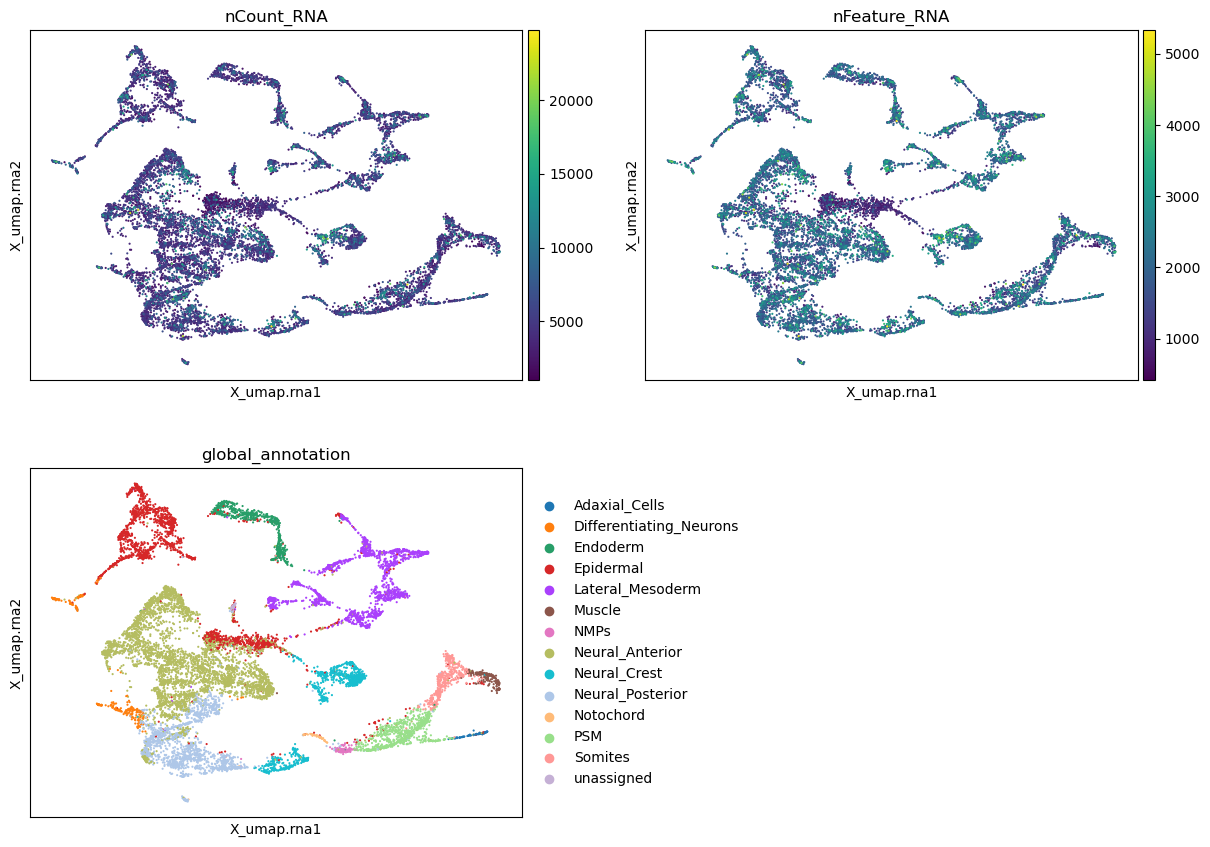

In [4]:
# plot the UMAPs (RNA)
sc.pl.embedding(adata_RNA, basis="X_umap.rna", 
               color = ["nCount_RNA","nFeature_RNA","global_annotation"],
               ncols=2)

/hpc/user_apps/data.science/conda_envs/single-cell-basics/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


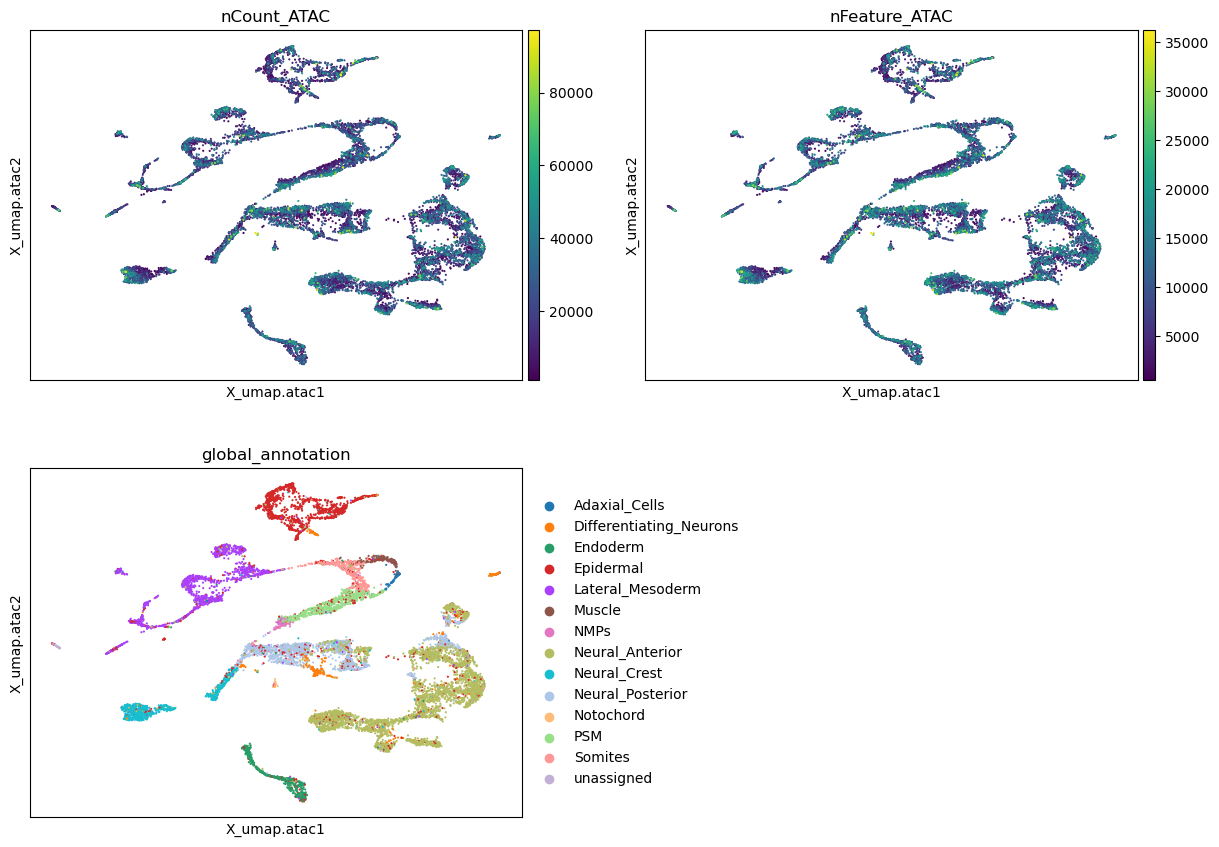

In [5]:
# plot the UMAPs (ATAC)
sc.pl.embedding(adata_ATAC, basis="X_umap.atac", 
               color = ["nCount_ATAC","nFeature_ATAC","global_annotation"],
               ncols=2)

/hpc/user_apps/data.science/conda_envs/single-cell-basics/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


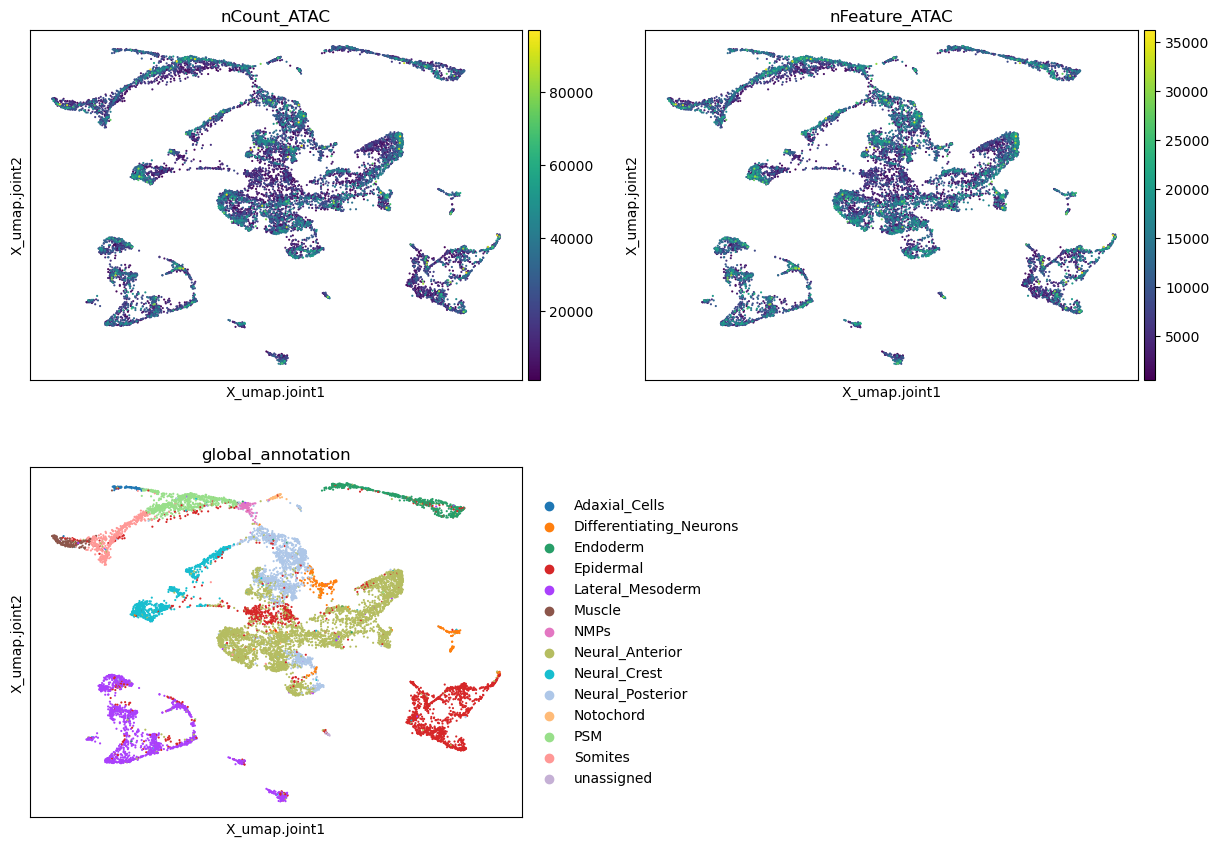

In [6]:
# plot the UMAPs (ATAC)
sc.pl.embedding(adata_ATAC, basis="X_umap.joint", 
               color = ["nCount_ATAC","nFeature_ATAC","global_annotation"],
               ncols=2)